In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
df=pd.read_csv("Life Expectancy Data.csv")

In [4]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:

print("Dataset Information:")
df.info()

print("\nFirst 5 Rows of the Dataset:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe().T)

print("\nData Types:")
print(df.dtypes)

print("\nDataset Shape:")
print(df.shape)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12 

In [10]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("\nMissing Values Count before handling:")
print(missing_values)

print("\nPercentage of Missing Values:")
print(missing_percentage)

print("\nNumber of Unique Values in Each Column:")
print(df.nunique())


Missing Values Count before handling:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Percentage of Missing Values:
Country                             0.000000
Year          

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
excluded_columns= ['Country','Status','Alcohol','Hepatitis B', 'Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling']
df.drop(excluded_columns, axis=1, inplace= True)
df.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'percentage expenditure', 'Measles ', ' BMI ', 'under-five deaths ',
       'Polio', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years',
       ' thinness 5-9 years'],
      dtype='object')

In [16]:
df = df.dropna(subset=["Life expectancy "])
print("After Dropping missing values in Target column: ")
df.shape

After Dropping missing values in Target column: 


(2928, 13)

In [18]:
# Handle missing values in features by imputing with median
imputer = SimpleImputer(strategy="median")
df[:] = imputer.fit_transform(df)  # Ensure correct assignment

# Check if any missing values remain after imputation
print("Missing values after imputation:", df.isnull().sum().sum())

Missing values after imputation: 0


C:\Users\hp\AppData\Local\Temp\ipykernel_6664\3109080127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[:] = imputer.fit_transform(df)  # Ensure correct assignment


In [20]:
X = df.drop(columns=["Life expectancy "])
y = df["Life expectancy "]

In [22]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert back to DataFrame to check for missing values after scaling
X = pd.DataFrame(X, columns=df.drop(columns=["Life expectancy "]).columns)

# Check for missing values after scaling
print("Missing values in X after imputation and scaling:", X.isnull().sum().sum())

Missing values in X after imputation and scaling: 0


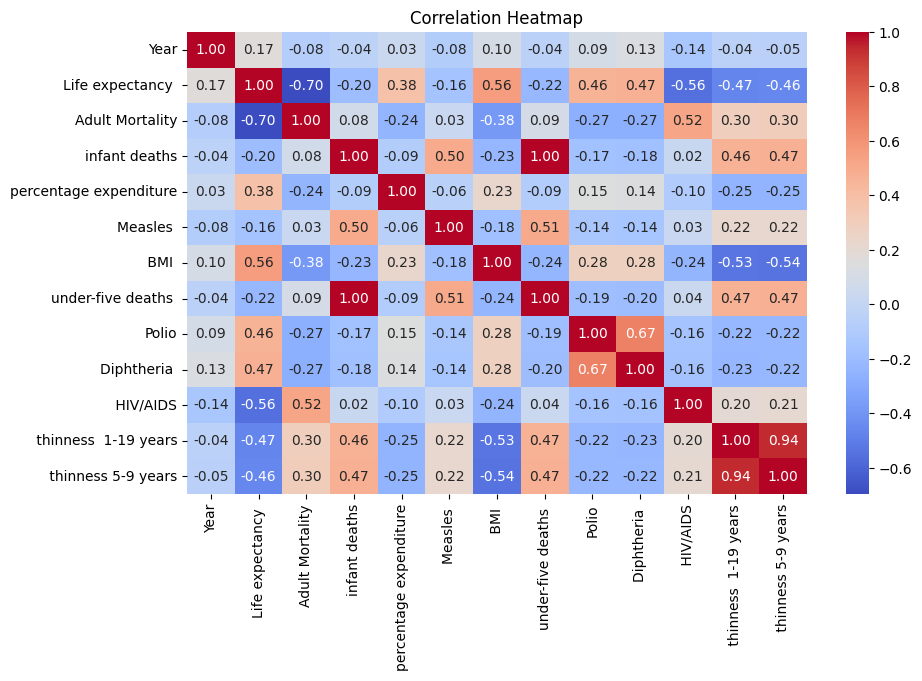

 BMI                      0.558888
Diphtheria                0.473268
Polio                     0.459458
percentage expenditure    0.381864
Year                      0.170033
Measles                  -0.157586
infant deaths            -0.196557
under-five deaths        -0.222529
 thinness 5-9 years      -0.462645
 thinness  1-19 years    -0.467859
 HIV/AIDS                -0.556556
Adult Mortality          -0.696359
Name: Life expectancy , dtype: float64


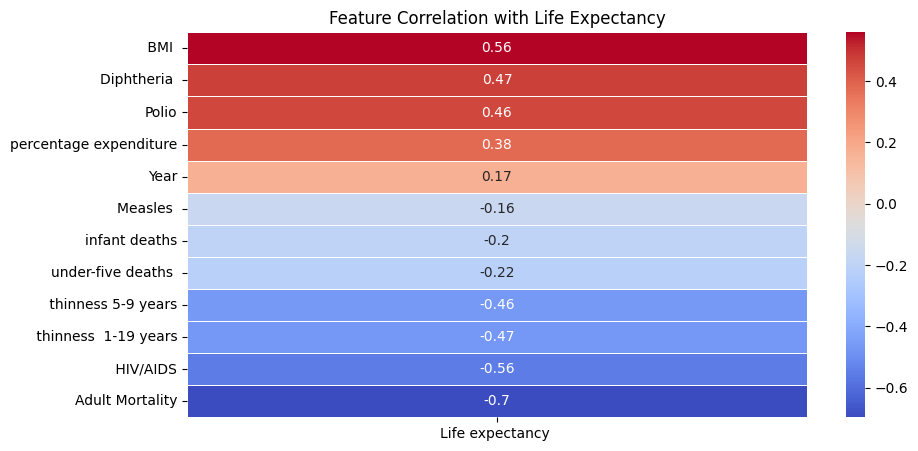

In [24]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

corr_matrix = df.corr()

# Sort features by correlation with the target variable
correlation_target = corr_matrix["Life expectancy "].drop("Life expectancy ").sort_values(ascending=False)
print(correlation_target)

# Plot correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_target.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation with Life Expectancy")
plt.show()

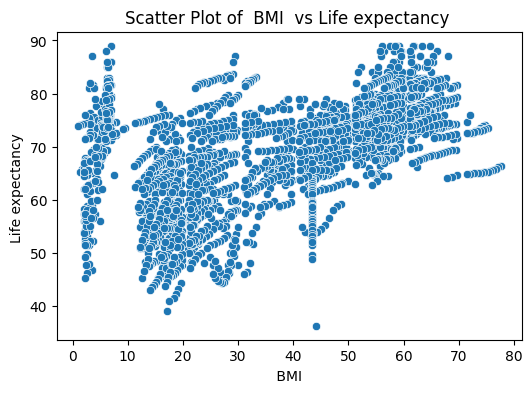

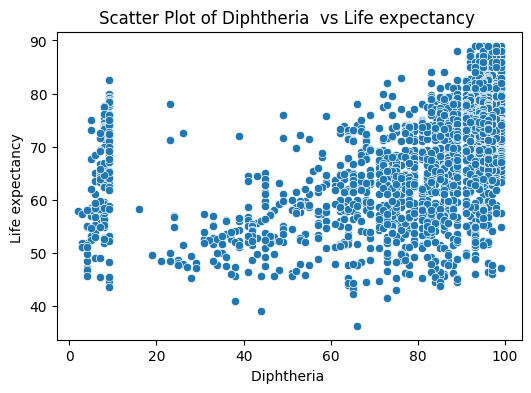

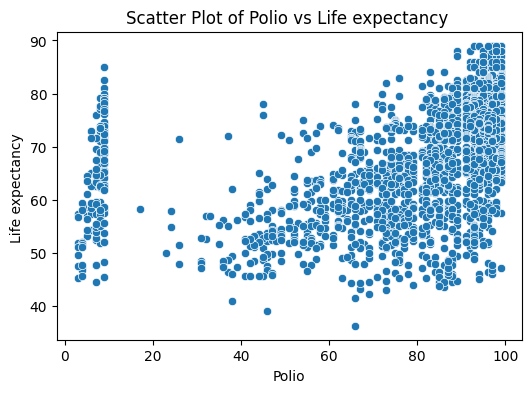

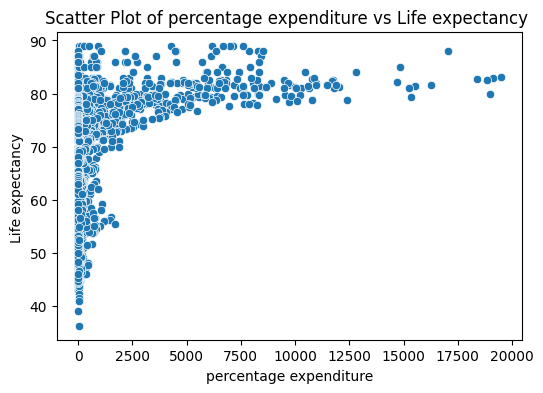

In [40]:
target_column = "Life expectancy "  
selected_features = [ " BMI ","Diphtheria ","Polio", "percentage expenditure"] 

for feature in selected_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df[target_column])
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.title(f"Scatter Plot of {feature} vs {target_column}")
    plt.show()

In [26]:
X_bmi = df[[" BMI "]].values
y = df["Life expectancy "]

In [56]:
X_train_bmi, X_test_bmi, y_train, y_test = train_test_split(X_bmi, y, test_size=0.3, random_state=42)

slr_model = LinearRegression()
slr_model.fit(X_train_bmi, y_train)


LinearRegression()

In [102]:
y_pred_slr = slr_model.predict(X_test_bmi)

In [104]:
mse = mean_squared_error(y_test, y_pred_slr)
mae = mean_absolute_error(y_test, y_pred_slr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_slr)

In [106]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 63.20957539427112
Mean Absolute Error: 5.998918389381229
Root Mean Squared Error: 7.950444980897052
R-squared Score: 0.3231688106381959


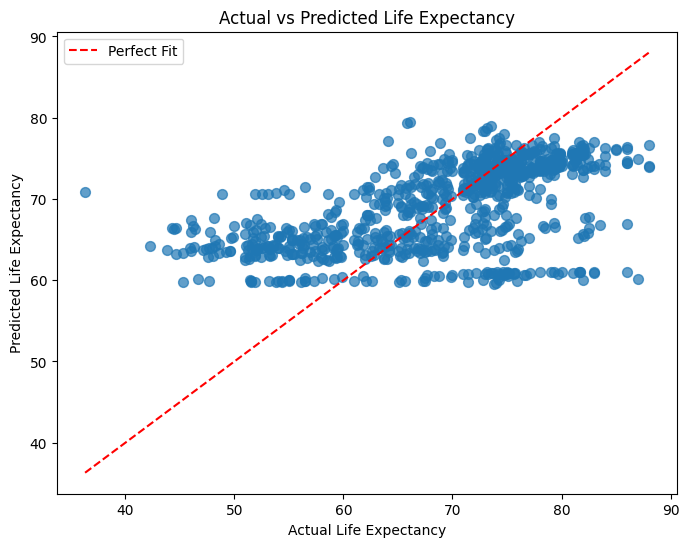

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_slr, alpha=0.7, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Fit")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.legend()
plt.show()
